In [110]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix, classification_report, roc_curve

import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.optimizers import Adam
from keras import regularizers
from keras.constraints import MaxNorm

In [111]:
# Cargar el dataset

df = pd.read_csv('Credit_Card_Dataset.csv')
print("Dimensiones del dataset:", df.shape)
print("\nPrimeras filas:")
df.head()

Dimensiones del dataset: (10000, 24)

Primeras filas:


,Customer_ID,Age,Gender,Marital_Status,Education_Level,Employment_Status,Annual_Income,Credit_Score,Number_of_Credit_Lines,Credit_Utilization_Ratio,...,Total_Spend_Last_Year,Defaulted,CLV,Total_Transactions,Avg_Transaction_Amount,Max_Transaction_Amount,Min_Transaction_Amount,Fraud_Transactions,Unique_Merchant_Categories,Unique_Transaction_Cities
0,CUST_00001,59,Male,Married,PhD,Unemployed,41442,642,4,0.44,...,13997,0,57310,22,454.337273,1379.89,11.83,0,10,13
1,CUST_00002,49,Male,Divorced,High School,Unemployed,85992,665,7,0.52,...,27768,0,124494,22,378.365000,1939.47,7.00,1,8,13
2,CUST_00003,35,Male,Married,Bachelor,Employed,58420,683,8,0.88,...,17979,1,46180,10,437.929000,1712.14,1.92,0,7,9
3,CUST_00004,63,Male,Single,Bachelor,Employed,59733,674,7,0.40,...,13261,1,35120,23,540.463913,2095.41,16.57,0,9,15
4,CUST_00005,28,Female,Married,Master,Employed,69487,733,5,0.88,...,23562,1,24310,16,520.643750,2068.37,28.06,1,8,12


In [112]:
# Información general del dataset
print("\nInformación del dataset:")
df.info()

print("\nEstadísticas descriptivas:")
df.describe()


Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Customer_ID                   10000 non-null  object 
 1   Age                           10000 non-null  int64  
 2   Gender                        10000 non-null  object 
 3   Marital_Status                10000 non-null  object 
 4   Education_Level               10000 non-null  object 
 5   Employment_Status             10000 non-null  object 
 6   Annual_Income                 10000 non-null  int64  
 7   Credit_Score                  10000 non-null  int64  
 8   Number_of_Credit_Lines        10000 non-null  int64  
 9   Credit_Utilization_Ratio      10000 non-null  float64
 10  Debt_To_Income_Ratio          10000 non-null  float64
 11  Number_of_Late_Payments       10000 non-null  int64  
 12  Tenure_in_Years               10000

,Age,Annual_Income,Credit_Score,Number_of_Credit_Lines,Credit_Utilization_Ratio,Debt_To_Income_Ratio,Number_of_Late_Payments,Tenure_in_Years,Total_Transactions_Last_Year,Total_Spend_Last_Year,Defaulted,CLV,Total_Transactions,Avg_Transaction_Amount,Max_Transaction_Amount,Min_Transaction_Amount,Fraud_Transactions,Unique_Merchant_Categories,Unique_Transaction_Cities
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,45.151500,60266.917400,648.739800,4.997100,0.499742,0.496404,1.005100,14.374100,103.678300,15039.833800,0.345100,45048.057900,20.000000,499.684392,1788.102222,26.028774,0.329200,8.649500,12.648800
std,14.083223,15109.825468,50.082106,2.600494,0.291170,0.288152,1.009146,8.709129,54.562023,6544.226127,0.475425,27257.520172,4.421058,114.031482,647.904025,27.730068,0.568735,1.079058,2.151539
min,21.000000,576.000000,469.000000,1.000000,0.000000,0.000000,0.000000,0.000000,10.000000,201.000000,0.000000,990.000000,6.000000,189.168235,414.200000,0.000000,0.000000,4.000000,4.000000
25%,33.000000,50161.750000,615.000000,3.000000,0.240000,0.250000,0.000000,7.000000,56.000000,9772.750000,0.000000,24213.000000,17.000000,419.651364,1333.022500,7.290000,0.000000,8.000000,11.000000
50%,45.000000,60167.500000,649.000000,5.000000,0.500000,0.500000,1.000000,14.000000,103.000000,14263.500000,0.000000,38549.500000,20.000000,490.280000,1676.360000,17.500000,0.000000,9.000000,13.000000
75%,57.000000,70355.250000,683.000000,7.000000,0.760000,0.740000,2.000000,22.000000,151.000000,19420.500000,1.000000,60312.500000,23.000000,568.366161,2124.622500,35.672500,1.000000,9.000000,14.000000
max,69.000000,112128.000000,832.000000,9.000000,1.000000,1.000000,7.000000,29.000000,199.000000,41128.000000,1.000000,170968.000000,37.000000,1172.910833,7096.240000,376.010000,5.000000,10.000000,19.000000


In [113]:
# Copia del dataframe para preprocesamiento
df_processed = df.copy()

# Eliminar Customer_ID 
df_processed = df_processed.drop('Customer_ID', axis=1)

print("Columnas del dataset:", df_processed.columns.tolist())
print(f"\nNúmero de características: {df_processed.shape[1]-1}")

Columnas del dataset: ['Age', 'Gender', 'Marital_Status', 'Education_Level', 'Employment_Status', 'Annual_Income', 'Credit_Score', 'Number_of_Credit_Lines', 'Credit_Utilization_Ratio', 'Debt_To_Income_Ratio', 'Number_of_Late_Payments', 'Tenure_in_Years', 'Total_Transactions_Last_Year', 'Total_Spend_Last_Year', 'Defaulted', 'CLV', 'Total_Transactions', 'Avg_Transaction_Amount', 'Max_Transaction_Amount', 'Min_Transaction_Amount', 'Fraud_Transactions', 'Unique_Merchant_Categories', 'Unique_Transaction_Cities']

Número de características: 22


In [114]:
# Identificar columnas categóricas y numéricas
categorical_cols = df_processed.select_dtypes(include=['object']).columns.tolist()
numerical_cols = df_processed.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Remover 'Defaulted' de las columnas numéricas (es la variable objetivo)
if 'Defaulted' in numerical_cols:
    numerical_cols.remove('Defaulted')

print(f"Columnas categóricas ({len(categorical_cols)}): {categorical_cols}")
print(f"\nColumnas numéricas ({len(numerical_cols)}): {numerical_cols}")

Columnas categóricas (4): ['Gender', 'Marital_Status', 'Education_Level', 'Employment_Status']

Columnas numéricas (18): ['Age', 'Annual_Income', 'Credit_Score', 'Number_of_Credit_Lines', 'Credit_Utilization_Ratio', 'Debt_To_Income_Ratio', 'Number_of_Late_Payments', 'Tenure_in_Years', 'Total_Transactions_Last_Year', 'Total_Spend_Last_Year', 'CLV', 'Total_Transactions', 'Avg_Transaction_Amount', 'Max_Transaction_Amount', 'Min_Transaction_Amount', 'Fraud_Transactions', 'Unique_Merchant_Categories', 'Unique_Transaction_Cities']


In [115]:
# Codificar variables categóricas usando Label Encoding
label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    df_processed[col] = le.fit_transform(df_processed[col])
    label_encoders[col] = le
    print(f"{col}: {len(le.classes_)} categorías")

print("\nCodificación completada.")

Gender: 2 categorías
Marital_Status: 3 categorías
Education_Level: 4 categorías
Employment_Status: 3 categorías

Codificación completada.


In [116]:
# Separar características (X) y variable objetivo (y)
X = df_processed.drop('Defaulted', axis=1)
y = df_processed['Defaulted']

print(f"Forma de X: {X.shape}")
print(f"Forma de y: {y.shape}")
print(f"\nNúmero total de características: {X.shape[1]}")

Forma de X: (10000, 22)
Forma de y: (10000,)

Número total de características: 22


In [117]:
# Split train val test
# Test 20%
X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Segunda división: separar train y validation del 80% restante
# 60% train y 20% validation del total (0.25 del 80% = 20% del total)
X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.25, random_state=42, stratify=y_temp
)

In [118]:
# Estandarizamos las características numéricas
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [119]:
print(f"Media de características (train): {X_train_scaled.mean():.6f}")
print(f"Desviación estándar (train): {X_train_scaled.std():.6f}")
print(f"Media de características (val): {X_val_scaled.mean():.6f}")
print(f"Desviación estándar (val): {X_val_scaled.std():.6f}")

Media de características (train): -0.000000
Desviación estándar (train): 1.000000
Media de características (val): -0.000105
Desviación estándar (val): 1.002227


In [120]:
# Definición de los hiperparámetros para irlos moviendo aquí más fácil

hiperparametros = {
    'num_layers': 6,  
    'neurons': [500, 300, 200, 130, 80, 20], 
    'activation_hidden': 'relu',  
    'activation_output': 'sigmoid',  
    'kernel_initializer': 'he_uniform',  
    
    'dropout_rates': [0.4, 0.3, 0.3, 0.2, 0.2, 0.1], 
    'use_batch_norm': True,  
    'batch_norm_momentum': 0.95,  
    'batch_norm_epsilon': 0.001,  
    'l1_regularization': 0.0,  # L1 regularization (0.0 = desactivado)
    'l2_regularization': 0.005,  # L2 regularization (0.0 = desactivado)
    'kernel_constraint': 3.0,  # None o valor para max_norm
    
    'optimizer_type': 'adamax',  
    'learning_rate': 0.001,  
    'beta_1': 0.9,  # Para Adam/Nadam
    'beta_2': 0.999,  # Para Adam/Nadam
    'epsilon': 1e-05,  # Para Adam
    'amsgrad': False,  # Usar AMSGrad variant
    'momentum': 0.0,  # Para SGD (si se usa)
    'nesterov': False,  # Usar Nesterov momentum (para SGD)
    'clipnorm': None,  # Gradient clipping por norma (None = desactivado)
    'clipvalue': None,  # Gradient clipping por valor (None = desactivado)
    
    'loss': 'binary_crossentropy',  
    'focal_loss_gamma': 2.0,  
    'focal_loss_alpha': 0.25, 
    
    'metrics': ['accuracy', 'auc', 'precision', 'recall'], 
    
    'epochs': 150,  
    'batch_size': 130, 
    'shuffle': True,  # Mezclar datos en cada época
    

    'use_early_stopping': True,
    'early_stopping_monitor': 'val_loss',  # 'val_loss', 'val_accuracy', 'val_auc'
    'early_stopping_patience': 25,
    'early_stopping_min_delta': 0.0005,
    'early_stopping_mode': 'max',  
    'restore_best_weights': True,
    
    'use_reduce_lr': True,
    'reduce_lr_monitor': 'val_accuracy',
    'reduce_lr_factor': 0.3,
    'reduce_lr_patience': 8,
    'reduce_lr_min_lr': 0.00001,
    'reduce_lr_min_delta': 0.0001,

    'verbose': 1,  
    'prediction_threshold': 0.5, 
}


In [121]:
def create_deep_learning_model(input_dim, hp):
    """
    Crea un modelo de red neuronal profunda para clasificación binaria.
    
    Args:
        input_dim: Dimensión de entrada (número de características)
        hp: Diccionario con hiperparámetros
    
    Returns:
        Modelo compilado de Keras
    """
    
    model = Sequential()
    
    neurons_list = hp['neurons'].copy()
    if len(neurons_list) < hp['num_layers']:
        last_neurons = neurons_list[-1]
        neurons_list.extend([last_neurons] * (hp['num_layers'] - len(neurons_list)))
    
    dropout_list = hp['dropout_rates'].copy()
    if len(dropout_list) < hp['num_layers']:
        dropout_list.extend([dropout_list[-1]] * (hp['num_layers'] - len(dropout_list)))
    
    kernel_reg = None
    if hp['l1_regularization'] > 0 and hp['l2_regularization'] > 0:
        kernel_reg = regularizers.l1_l2(l1=hp['l1_regularization'], l2=hp['l2_regularization'])
    elif hp['l1_regularization'] > 0:
        kernel_reg = regularizers.l1(hp['l1_regularization'])
    elif hp['l2_regularization'] > 0:
        kernel_reg = regularizers.l2(hp['l2_regularization'])
    
    kernel_const = MaxNorm(hp['kernel_constraint']) if hp['kernel_constraint'] else None
    
    # capas ocultas
    for i in range(hp['num_layers']):
        if i == 0:
            # Primera capa (entrada)
            model.add(Dense(
                neurons_list[i],
                activation=hp['activation_hidden'],
                input_dim=input_dim,
                kernel_initializer=hp['kernel_initializer'],
                kernel_regularizer=kernel_reg,
                kernel_constraint=kernel_const,
                name=f'layer_{i}'
            ))
        else:
            model.add(Dense(
                neurons_list[i],
                activation=hp['activation_hidden'],
                kernel_initializer=hp['kernel_initializer'],
                kernel_regularizer=kernel_reg,
                kernel_constraint=kernel_const,
                name=f'layer_{i}'
            ))
        
        if hp['use_batch_norm']:
            model.add(BatchNormalization(
                momentum=hp['batch_norm_momentum'],
                epsilon=hp['batch_norm_epsilon']
            ))
        

        if dropout_list[i] > 0:
            model.add(Dropout(dropout_list[i]))
    
    # Capa de salida
    model.add(Dense(
        1,
        activation=hp['activation_output'],
        name='output_layer'
    ))
    
    # Configurar optimizador
    if hp['optimizer_type'].lower() == 'adam':
        optimizer = tf.keras.optimizers.Adam(
            learning_rate=hp['learning_rate'],
            beta_1=hp['beta_1'],
            beta_2=hp['beta_2'],
            epsilon=hp['epsilon'],
            amsgrad=hp['amsgrad'],
            clipnorm=hp['clipnorm'],
            clipvalue=hp['clipvalue']
        )
    elif hp['optimizer_type'].lower() == 'sgd':
        optimizer = tf.keras.optimizers.SGD(
            learning_rate=hp['learning_rate'],
            momentum=hp['momentum'],
            nesterov=hp['nesterov'],
            clipnorm=hp['clipnorm'],
            clipvalue=hp['clipvalue']
        )
    elif hp['optimizer_type'].lower() == 'nadam':
        optimizer = tf.keras.optimizers.Nadam(
            learning_rate=hp['learning_rate'],
            beta_1=hp['beta_1'],
            beta_2=hp['beta_2'],
            epsilon=hp['epsilon'],
            clipnorm=hp['clipnorm'],
            clipvalue=hp['clipvalue']
        )
    elif hp['optimizer_type'].lower() == 'rmsprop':
        optimizer = tf.keras.optimizers.RMSprop(
            learning_rate=hp['learning_rate'],
            momentum=hp['momentum'],
            epsilon=hp['epsilon'],
            clipnorm=hp['clipnorm'],
            clipvalue=hp['clipvalue']
        )
    else:
        optimizer = Adam(learning_rate=hp['learning_rate'])
    
    # Configurar métricas
    metrics_list = []
    for metric in hp['metrics']:
        if metric == 'accuracy':
            metrics_list.append('accuracy')
        elif metric == 'auc':
            metrics_list.append(tf.keras.metrics.AUC(name='auc'))
        elif metric == 'precision':
            metrics_list.append(tf.keras.metrics.Precision(name='precision'))
        elif metric == 'recall':
            metrics_list.append(tf.keras.metrics.Recall(name='recall'))
    
    # Compilar el modelo
    model.compile(
        optimizer=optimizer,
        loss=hp['loss'],
        metrics=metrics_list
    )
    
    return model

input_dimension = X_train_scaled.shape[1]
model = create_deep_learning_model(input_dimension, hiperparametros)

print("Arquitectura del Modelo de Deep Learning:\n")
model.summary()

/Users/karimmetejeda/Documents/MODELOS DE CRÉDITO/Códigos de clases/Modelo-de-cr-dito/.venv/lib/python3.11/site-packages/keras/src/layers/core/dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Arquitectura del Modelo de Deep Learning:



Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ layer_0 (Dense)                 │ (None, 500)            │        11,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_107         │ (None, 500)            │         2,000 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_107 (Dropout)           │ (None, 500)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_1 (Dense)                 │ (None, 300)            │       150,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_108         │ (None, 300)            │         1,200 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_108 (Dropout)           │ (None, 300)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_2 (Dense)                 │ (None, 200)            │        60,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_109         │ (None, 200)            │           800 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_109 (Dropout)           │ (None, 200)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_3 (Dense)                 │ (None, 130)            │        26,130 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_110         │ (None, 130)            │           520 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_110 (Dropout)           │ (None, 130)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_4 (Dense)                 │ (None, 80)             │        10,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_111         │ (None, 80)             │           320 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_111 (Dropout)           │ (None, 80)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_5 (Dense)                 │ (None, 20)             │         1,620 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_112         │ (None, 20)             │            80 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_112 (Dropout)           │ (None, 20)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            21 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 265,171 (1.01 MB)

 Trainable params: 262,711 (1.00 MB)

 Non-trainable params: 2,460 (9.61 KB)

In [122]:
# ENTRENAMIENTO DEL MODELO

callbacks = []

if hiperparametros['use_early_stopping']:
    early_stopping = EarlyStopping(
        monitor=hiperparametros['early_stopping_monitor'],
        patience=hiperparametros['early_stopping_patience'],
        min_delta=hiperparametros['early_stopping_min_delta'],
        mode=hiperparametros['early_stopping_mode'],
        restore_best_weights=hiperparametros['restore_best_weights'],
        verbose=hiperparametros['verbose']
    )
    callbacks.append(early_stopping)

if hiperparametros['use_reduce_lr']:
    reduce_lr = ReduceLROnPlateau(
        monitor=hiperparametros['reduce_lr_monitor'],
        factor=hiperparametros['reduce_lr_factor'],
        patience=hiperparametros['reduce_lr_patience'],
        min_lr=hiperparametros['reduce_lr_min_lr'],
        min_delta=hiperparametros['reduce_lr_min_delta'],
        verbose=hiperparametros['verbose']
    )
    callbacks.append(reduce_lr)


In [123]:
history = model.fit(
    X_train_scaled, y_train,
    validation_split=0.2,
    epochs=hiperparametros['epochs'],
    batch_size=hiperparametros['batch_size'],
    shuffle=hiperparametros['shuffle'],
    callbacks=callbacks,
    verbose=hiperparametros['verbose']
)

Epoch 1/150
37/37 ━━━━━━━━━━━━━━━━━━━━ 55s 253ms/step - accuracy: 0.5308 - auc: 0.5228 - loss: 12.6983 - precision: 0.3569 - recall: 0.4519 - val_accuracy: 0.6125 - val_auc: 0.5837 - val_loss: 11.9641 - val_precision: 0.4299 - val_recall: 0.3445 - learning_rate: 0.0010
Epoch 2/150
37/37 ━━━━━━━━━━━━━━━━━━━━ 9s 240ms/step - accuracy: 0.5819 - auc: 0.5679 - loss: 11.5355 - precision: 0.3990 - recall: 0.4229 - val_accuracy: 0.6108 - val_auc: 0.5930 - val_loss: 10.9043 - val_precision: 0.4061 - val_recall: 0.2536 - learning_rate: 0.0010
Epoch 3/150
37/37 ━━━━━━━━━━━━━━━━━━━━ 5s 137ms/step - accuracy: 0.6137 - auc: 0.5797 - loss: 10.4204 - precision: 0.4249 - recall: 0.3442 - val_accuracy: 0.6375 - val_auc: 0.6038 - val_loss: 9.8208 - val_precision: 0.4105 - val_recall: 0.0933 - learning_rate: 0.0010
Epoch 4/150
37/37 ━━━━━━━━━━━━━━━━━━━━ 5s 121ms/step - accuracy: 0.6371 - auc: 0.5938 - loss: 9.3539 - precision: 0.4595 - recall: 0.3055 - val_accuracy: 0.6450 - val_auc: 0.6217 - val_loss: 8.

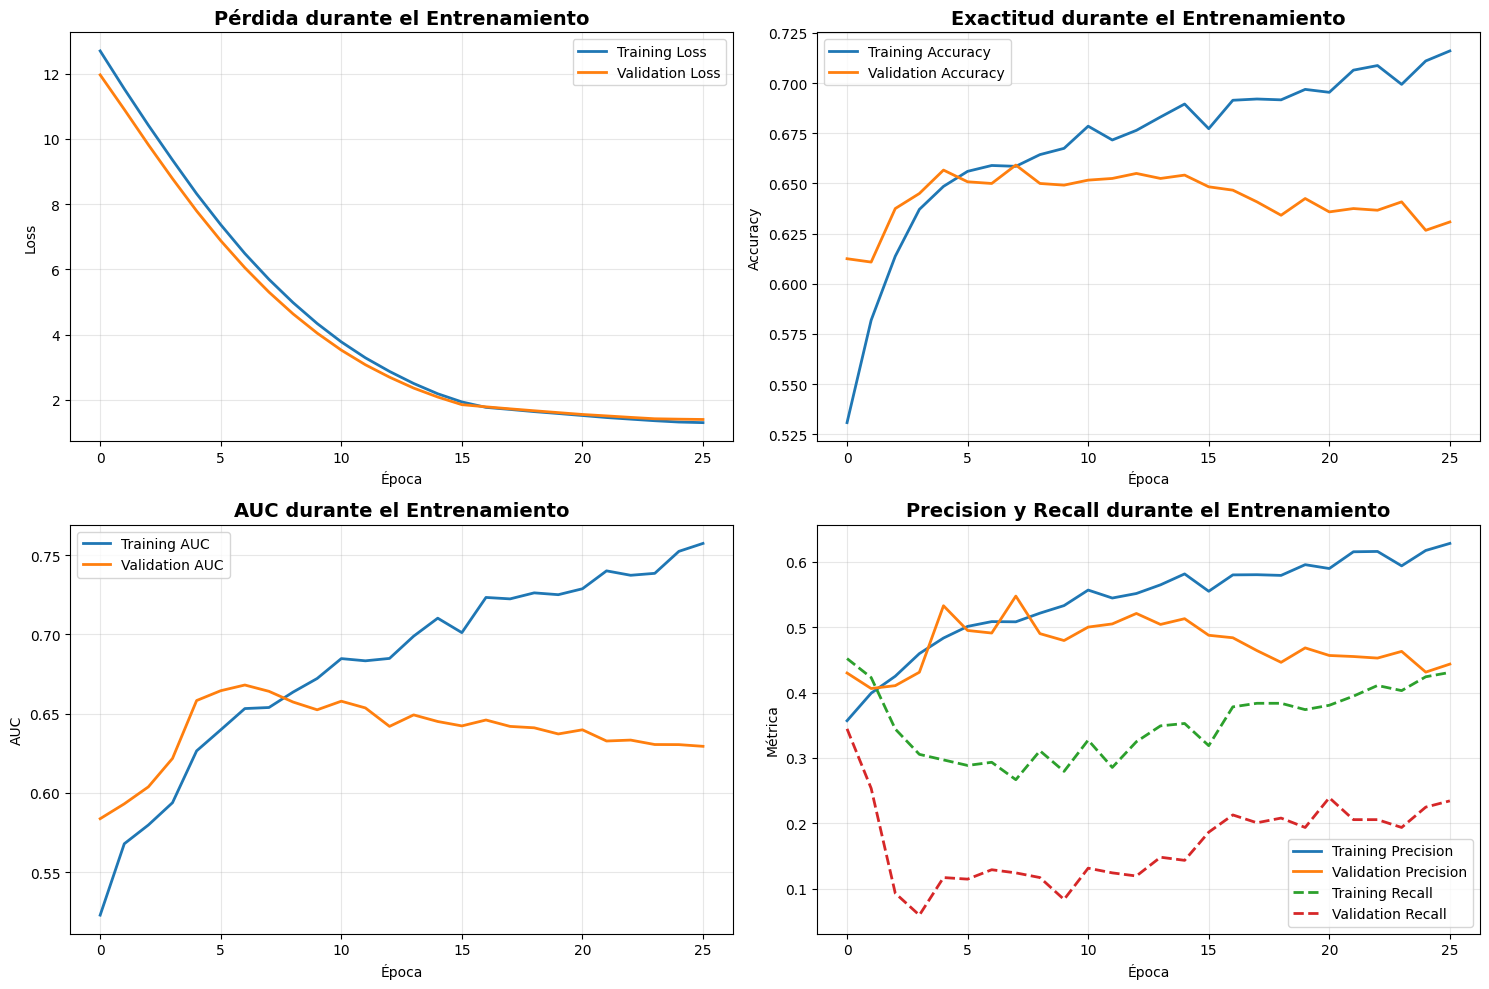

In [124]:
# VISUALIZACIÓN DEL ENTRENAMIENTO

def plot_training_history(history):
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    
    # Loss
    axes[0, 0].plot(history.history['loss'], label='Training Loss', linewidth=2)
    axes[0, 0].plot(history.history['val_loss'], label='Validation Loss', linewidth=2)
    axes[0, 0].set_title('Pérdida durante el Entrenamiento', fontsize=14, fontweight='bold')
    axes[0, 0].set_xlabel('Época')
    axes[0, 0].set_ylabel('Loss')
    axes[0, 0].legend()
    axes[0, 0].grid(True, alpha=0.3)
    
    # Accuracy
    axes[0, 1].plot(history.history['accuracy'], label='Training Accuracy', linewidth=2)
    axes[0, 1].plot(history.history['val_accuracy'], label='Validation Accuracy', linewidth=2)
    axes[0, 1].set_title('Exactitud durante el Entrenamiento', fontsize=14, fontweight='bold')
    axes[0, 1].set_xlabel('Época')
    axes[0, 1].set_ylabel('Accuracy')
    axes[0, 1].legend()
    axes[0, 1].grid(True, alpha=0.3)
    
    # AUC
    axes[1, 0].plot(history.history['auc'], label='Training AUC', linewidth=2)
    axes[1, 0].plot(history.history['val_auc'], label='Validation AUC', linewidth=2)
    axes[1, 0].set_title('AUC durante el Entrenamiento', fontsize=14, fontweight='bold')
    axes[1, 0].set_xlabel('Época')
    axes[1, 0].set_ylabel('AUC')
    axes[1, 0].legend()
    axes[1, 0].grid(True, alpha=0.3)
    
    # Precision y Recall
    axes[1, 1].plot(history.history['precision'], label='Training Precision', linewidth=2)
    axes[1, 1].plot(history.history['val_precision'], label='Validation Precision', linewidth=2)
    axes[1, 1].plot(history.history['recall'], label='Training Recall', linewidth=2, linestyle='--')
    axes[1, 1].plot(history.history['val_recall'], label='Validation Recall', linewidth=2, linestyle='--')
    axes[1, 1].set_title('Precision y Recall durante el Entrenamiento', fontsize=14, fontweight='bold')
    axes[1, 1].set_xlabel('Época')
    axes[1, 1].set_ylabel('Métrica')
    axes[1, 1].legend()
    axes[1, 1].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

plot_training_history(history)

In [125]:
y_pred_proba = model.predict(X_test_scaled)
y_pred = (y_pred_proba > hiperparametros['prediction_threshold']).astype(int).flatten()

print("Predicciones realizadas en el conjunto de prueba.")
print(f"Umbral de predicción: {hiperparametros['prediction_threshold']}")
print(f"Forma de y_pred_proba: {y_pred_proba.shape}")
print(f"Forma de y_pred: {y_pred.shape}")

63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step
Predicciones realizadas en el conjunto de prueba.
Umbral de predicción: 0.5
Forma de y_pred_proba: (2000, 1)
Forma de y_pred: (2000,)


In [126]:
# Calcular métricas de evaluación
accuracy_dl = accuracy_score(y_test, y_pred)
precision_dl = precision_score(y_test, y_pred)
recall_dl = recall_score(y_test, y_pred)
f1_dl = f1_score(y_test, y_pred)
roc_auc_dl = roc_auc_score(y_test, y_pred_proba)

print("="*60)
print("MÉTRICAS DE RENDIMIENTO - MODELO DE DEEP LEARNING")
print("="*60)
print(f"Accuracy:  {accuracy_dl:.4f} ({accuracy_dl*100:.2f}%)")
print(f"Precision: {precision_dl:.4f}")
print(f"Recall:    {recall_dl:.4f}")
print(f"F1-Score:  {f1_dl:.4f}")
print(f"AUC-ROC:   {roc_auc_dl:.4f}")
print("="*60)

MÉTRICAS DE RENDIMIENTO - MODELO DE DEEP LEARNING
Accuracy:  0.6200 (62.00%)
Precision: 0.4349
Recall:    0.3391
F1-Score:  0.3811
AUC-ROC:   0.5703


In [127]:
# Reporte de clasificación detallado
print("\nREPORTE DE CLASIFICACIÓN DETALLADO:\n")
print(classification_report(y_test, y_pred, target_names=['No Incumplimiento', 'Incumplimiento']))


REPORTE DE CLASIFICACIÓN DETALLADO:

                   precision    recall  f1-score   support

No Incumplimiento       0.69      0.77      0.73      1310
   Incumplimiento       0.43      0.34      0.38       690

         accuracy                           0.62      2000
        macro avg       0.56      0.55      0.55      2000
     weighted avg       0.60      0.62      0.61      2000



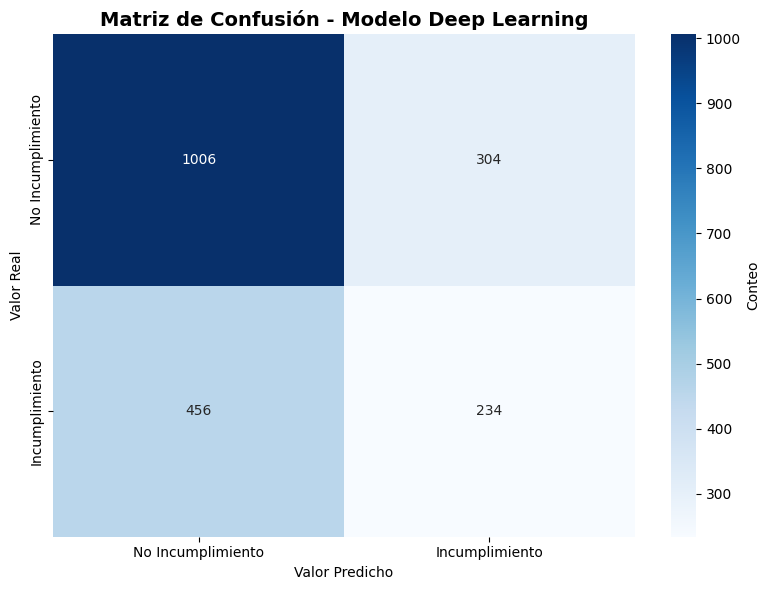


Interpretación de la Matriz de Confusión:
Verdaderos Negativos (TN): 1006 - Correctamente clasificados como NO incumplimiento
Falsos Positivos (FP): 304 - Incorrectamente clasificados como incumplimiento
Falsos Negativos (FN): 456 - Incorrectamente clasificados como NO incumplimiento
Verdaderos Positivos (TP): 234 - Correctamente clasificados como incumplimiento


In [128]:
# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['No Incumplimiento', 'Incumplimiento'],
            yticklabels=['No Incumplimiento', 'Incumplimiento'],
            cbar_kws={'label': 'Conteo'})
plt.title('Matriz de Confusión - Modelo Deep Learning', fontsize=14, fontweight='bold')
plt.ylabel('Valor Real')
plt.xlabel('Valor Predicho')
plt.tight_layout()
plt.show()

print("\nInterpretación de la Matriz de Confusión:")
print(f"Verdaderos Negativos (TN): {cm[0,0]} - Correctamente clasificados como NO incumplimiento")
print(f"Falsos Positivos (FP): {cm[0,1]} - Incorrectamente clasificados como incumplimiento")
print(f"Falsos Negativos (FN): {cm[1,0]} - Incorrectamente clasificados como NO incumplimiento")
print(f"Verdaderos Positivos (TP): {cm[1,1]} - Correctamente clasificados como incumplimiento")

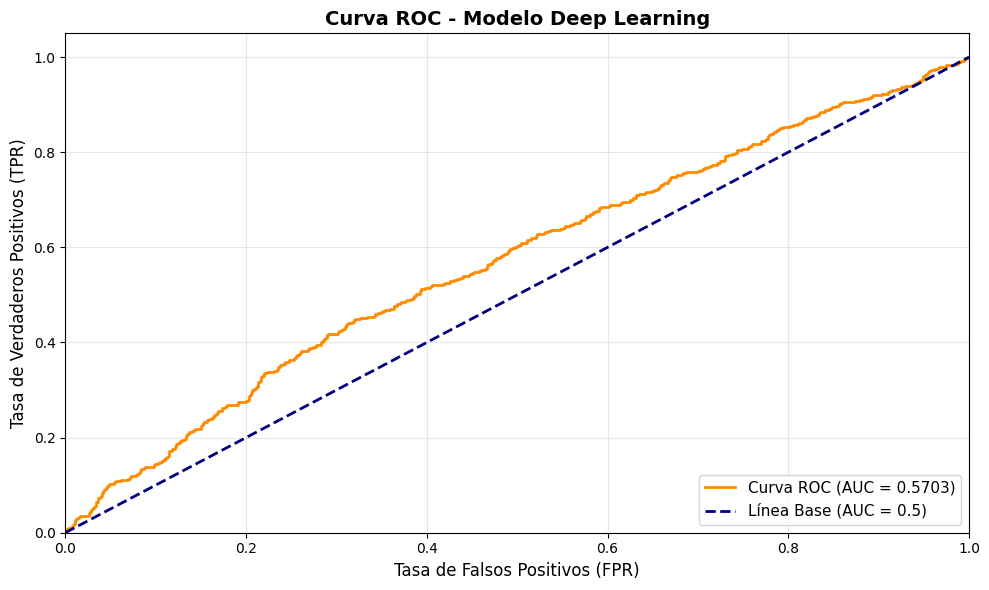

In [129]:
# Curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, 
         label=f'Curva ROC (AUC = {roc_auc_dl:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Línea Base (AUC = 0.5)')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos (FPR)', fontsize=12)
plt.ylabel('Tasa de Verdaderos Positivos (TPR)', fontsize=12)
plt.title('Curva ROC - Modelo Deep Learning', fontsize=14, fontweight='bold')
plt.legend(loc='lower right', fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()